# AirBnB rentals in Valencia

Dataset: http://insideairbnb.com/get-the-data.html | Valencia, Valencia, Spain | listings.csv.gz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
%matplotlib inline

In [2]:
listings = pd.read_csv('ValenciaListings.csv')

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,48154,https://www.airbnb.com/rooms/48154,20210921151226,2021-09-21,beautiful apartment wifi,<b>The space</b><br />Hello everybody and than...,NaN,https://a0.muscache.com/pictures/1109085/9c0d4...,219476,https://www.airbnb.com/users/show/219476,...,4.71,4.42,4.51,VT-41540-V,f,2,2,0,0,0.86
1,55692,https://www.airbnb.com/rooms/55692,20210921151226,2021-09-21,Delight in city center,A great place to stay and visit Valencia.<br /...,NaN,https://a0.muscache.com/pictures/329316/a5d6a7...,120649,https://www.airbnb.com/users/show/120649,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.01
2,95393,https://www.airbnb.com/rooms/95393,20210921151226,2021-09-21,Modern and bright Duplex 3 Bedrooms Center Wi-Fi,"This is ""Edificio Palomar Apartments"", I will ...",It is just 10 min walking distance to the Cath...,https://a0.muscache.com/pictures/931683/64aebc...,508042,https://www.airbnb.com/users/show/508042,...,4.77,4.78,4.70,31815,f,6,6,0,0,1.00
3,100347,https://www.airbnb.com/rooms/100347,20210921151226,2021-09-21,3BDR full Home at Sorolla station and Metro Jesús,Te va a encantar mi espacio por la ubicación y...,"Barrio de Jesús, cercano al centro, zona conso...",https://a0.muscache.com/pictures/b0bb18e8-1f24...,1451371,https://www.airbnb.com/users/show/1451371,...,4.89,4.80,4.65,NaN,f,1,1,0,0,2.89
4,102524,https://www.airbnb.com/rooms/102524,20210921151226,2021-09-21,EXCLUSIVE VILLA WITH POOL & 5 SUITES ON THE BEACH,DO NOT PARTY OR STAG/HEN PARTIES! THE RESERVAT...,Best restaurantes bars and clubs and chill out...,https://a0.muscache.com/pictures/d2019707-1596...,535881,https://www.airbnb.com/users/show/535881,...,4.59,4.76,4.36,VT-36438-V,f,7,6,1,0,1.33


In [4]:
listings.shape

(5545, 74)

In [5]:
pd.set_option('display.max_columns', 500)

## Cleaning data

### Column filtering

Leaving only those that will logically be of use for ruther analysis

In [6]:
useful_columns = ['id', 'listing_url', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic',
                 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
                  'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews',
                  'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value', 'instant_bookable']

listings = listings[useful_columns]
listings.head()

,id,listing_url,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,48154,https://www.airbnb.com/rooms/48154,2010-09-01,within an hour,100%,f,t,LA SAIDIA,39.48375,-0.37502,Entire rental unit,Entire home/apt,4,NaN,2.0,2.0,"[""TV"", ""Free street parking"", ""Iron"", ""Air con...",$70.00,t,26,56,86,361,110,4.57,4.64,4.59,4.83,4.71,4.42,4.51,f
1,55692,https://www.airbnb.com/rooms/55692,2010-05-08,NaN,NaN,f,t,CIUTAT VELLA,39.47658,-0.37654,Entire rental unit,Entire home/apt,3,NaN,1.0,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Long term stays all...",$100.00,t,0,0,0,82,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
2,95393,https://www.airbnb.com/rooms/95393,2011-04-14,within a few hours,100%,f,t,CIUTAT VELLA,39.47685,-0.38181,Entire rental unit,Entire home/apt,6,NaN,3.0,6.0,"[""Stove"", ""TV"", ""Iron"", ""Dishwasher"", ""Oven"", ...",$141.00,t,15,34,64,231,100,4.79,4.77,4.93,4.90,4.77,4.78,4.70,f
3,100347,https://www.airbnb.com/rooms/100347,2011-11-28,NaN,NaN,t,t,EXTRAMURS,39.45965,-0.38453,Entire rental unit,Entire home/apt,6,NaN,3.0,3.0,"[""Stove"", ""Free street parking"", ""Iron"", ""Dish...",$106.00,t,0,0,0,0,133,4.62,4.81,4.58,4.86,4.89,4.80,4.65,f
4,102524,https://www.airbnb.com/rooms/102524,2011-04-26,within an hour,100%,f,t,POBLATS MARITIMS,39.47343,-0.32901,Entire villa,Entire home/apt,16,NaN,5.0,20.0,"[""Stove"", ""Private pool"", ""TV"", ""Free street p...",$321.00,t,12,28,53,247,138,4.54,4.46,4.18,4.65,4.59,4.76,4.36,f


### Check duplicates

In [7]:
listings.drop_duplicates().shape[0] / listings.shape[0]

1.0

### Handling missing data and recodning types

In [8]:
# Removing all rows where there is no price
listings = listings.dropna(subset=['price'], axis=0)

# Recoding price to float
listings['price'] = listings['price'].apply(lambda x: float(x.replace('$','').replace(',','')))

In [9]:
# Verifying scale of missing values per column
listings.isna().sum() / listings.shape[0]

id                              0.000000
listing_url                     0.000000
host_since                      0.003246
host_response_time              0.149324
host_response_rate              0.149324
host_is_superhost               0.003246
host_has_profile_pic            0.003246
neighbourhood_group_cleansed    0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bathrooms                       1.000000
bedrooms                        0.053562
beds                            0.011722
amenities                       0.000000
price                           0.000000
has_availability                0.000000
availability_30                 0.000000
availability_60                 0.000000
availability_90                 0.000000
availability_365                0.000000
number_of_reviews               0.000000
review_scores_ra

In [10]:
listings.shape

(5545, 32)

In [11]:
# Dropping whole column bathrooms, since it is null only.
listings_clean = listings.drop(['bathrooms'], axis=1)

listings_clean = listings_clean.dropna(axis=0, how='any', subset=['bedrooms','beds'])

In [12]:
listings_clean.shape

(5190, 31)

In [13]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 0 to 5544
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5190 non-null   int64  
 1   listing_url                   5190 non-null   object 
 2   host_since                    5178 non-null   object 
 3   host_response_time            4397 non-null   object 
 4   host_response_rate            4397 non-null   object 
 5   host_is_superhost             5178 non-null   object 
 6   host_has_profile_pic          5178 non-null   object 
 7   neighbourhood_group_cleansed  5190 non-null   object 
 8   latitude                      5190 non-null   float64
 9   longitude                     5190 non-null   float64
 10  property_type                 5190 non-null   object 
 11  room_type                     5190 non-null   object 
 12  accommodates                  5190 non-null   int64  
 13  bed

There are still null values in columns regarding host and review. Those will be dropped later on, they do not affect price analysis

In [14]:
listings_clean['host_response_time'].value_counts()

within an hour        2993
within a few hours     873
within a day           355
a few days or more     176
Name: host_response_time, dtype: int64

In [15]:
#listings_clean['host_response_rate'].value_counts()

In [16]:
# Dropping those rows where columns below have missing value
listings_clean = listings_clean.dropna(axis=0, how='any', subset=['host_since','host_is_superhost','host_has_profile_pic','bedrooms','beds'])

## Price outliers

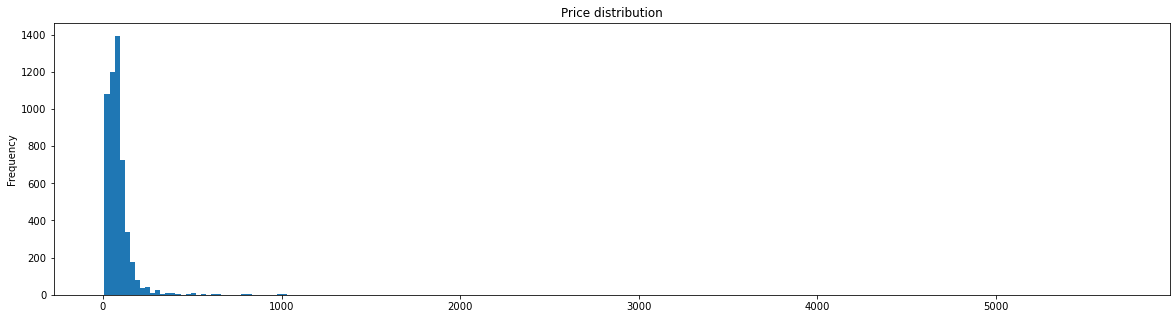

In [17]:
listings_clean['price'].plot.hist(bins=200, title='Price distribution', figsize=(20,5))

In [18]:
listings_clean['price'].describe()

count    5178.000000
mean       85.172654
std       120.524597
min         8.000000
25%        43.000000
50%        70.000000
75%       100.000000
max      5688.000000
Name: price, dtype: float64

Price parameter is right skewed. There is a property that costs $5.688 per night. I consider it as an outlier. We might look further into price distribution and define cutoff point at some level.

However it might be a better idea to verify accomodation availability. Those that are available throughout the whole time say that guests do not want to book it - market verification.

In [19]:
listings_clean = listings_clean.query('availability_30 < 27')
listings_clean['price'].describe()

count    4680.000000
mean       78.419444
std        61.060881
min         8.000000
25%        43.000000
50%        70.000000
75%        97.000000
max      1000.000000
Name: price, dtype: float64

This distribution is still right skewed (long tail) and further verification is required. Let's take a sample of the data.

In [20]:
listings_clean.query('price > 600')[['property_type','room_type','accommodates','bedrooms','price']]

,property_type,room_type,accommodates,bedrooms,price
210,Private room in rental unit,Private room,2,1.0,829.0
848,Entire rental unit,Entire home/apt,12,4.0,650.0
1276,Private room in rental unit,Private room,1,1.0,1000.0
1308,Entire residential home,Entire home/apt,14,4.0,814.0
2180,Entire rental unit,Entire home/apt,16,7.0,621.0
3072,Private room in residential home,Private room,1,1.0,800.0
3708,Room in boutique hotel,Private room,4,1.0,812.0
3709,Room in boutique hotel,Private room,4,1.0,677.0
5476,Entire rental unit,Entire home/apt,12,6.0,605.0


Within this group are properties which price might be justified e.g.
- Entire residential home acommodating 10 peaople in 5 bedrooms for the price of 520 EUR. 

However some are surely a unintended or intended mistake e.g.
- Private room in rental unit with one bedroom for 2 peaople for 423 EUR

To clean that up we will remove all entries that accomodate less than 5 people and cost over 400 EUR per night.

In [21]:
#listings_clean = listings_clean[~((listings_clean['price']>450) & (listings_clean['accommodates']<5))]
listings_clean.shape

(4680, 31)

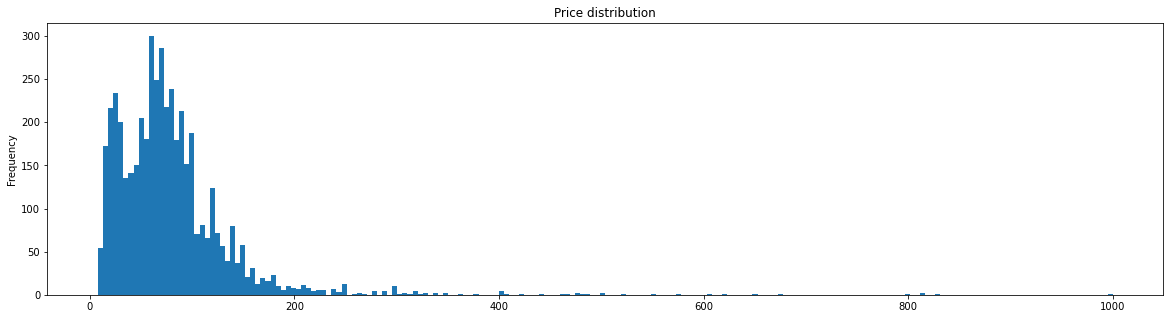

In [22]:
listings_clean['price'].plot.hist(bins=200, title='Price distribution', figsize=(20,5))

Now we reduced number of properties (rows) to 4684 but the data is more likely correct.

## Question 1: What are cheap and expensive nieghbourhoods

In [23]:
neighbourhood_median_order = listings_clean.groupby('neighbourhood_group_cleansed')['price'].median().sort_values(ascending=True)

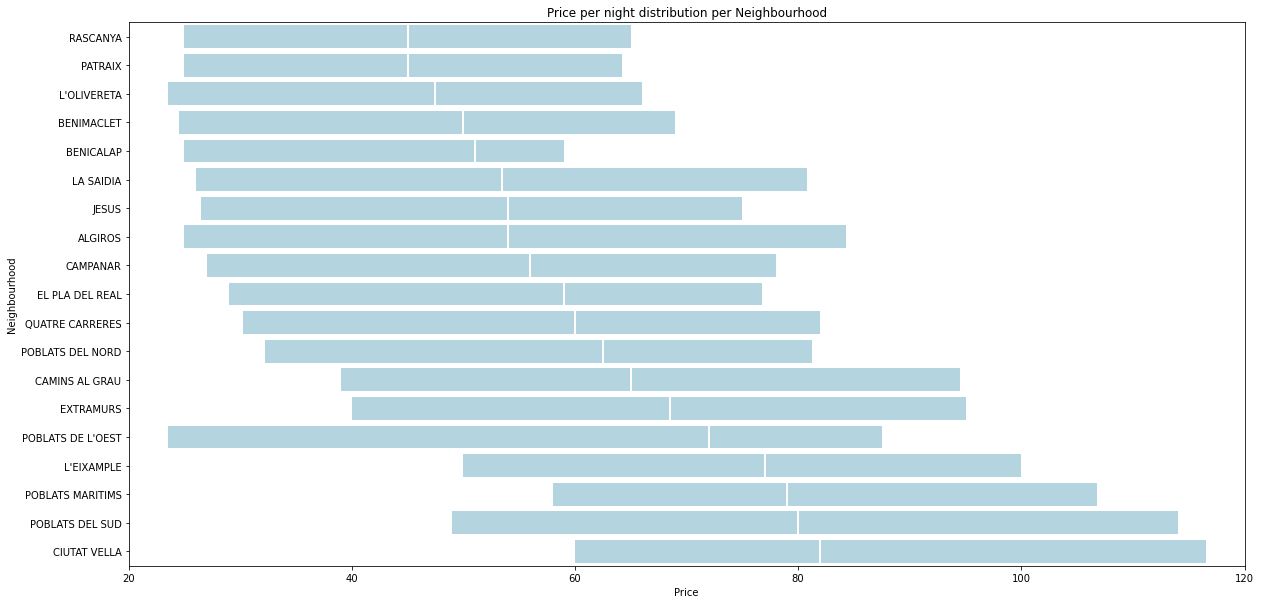

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
boxprops = dict(linewidth=.0)
medianprops = dict(linewidth=2, color='white')
whiskerprops = dict(linestyle='none', linewidth=.9, color='red')

sns.boxplot(y="neighbourhood_group_cleansed", 
            x="price", 
            data=listings_clean,
            ax=ax, 
            #color='red',
            #palette="YlOrBr",
            color="lightblue",
            orient='h', 
            order=neighbourhood_median_order.index,
            showfliers=False, 
            showbox=True, 
            showcaps=False,
            whiskerprops=whiskerprops,
            boxprops=boxprops,
            medianprops=medianprops
           )
plt.xlim((20,120))
plt.title('Price per night distribution per Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.show()

In [25]:
listings_clean.groupby('neighbourhood_group_cleansed').agg({'price':'describe'})['price'].sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
RASCANYA,90.0,48.366667,26.113602,12.0,25.00,45.0,65.00,120.0
PATRAIX,68.0,45.705882,24.460787,12.0,25.00,45.0,64.25,100.0
L'OLIVERETA,110.0,55.718182,44.076067,10.0,23.50,47.5,66.00,320.0
BENIMACLET,75.0,52.760000,33.884079,10.0,24.50,50.0,69.00,173.0
BENICALAP,75.0,46.346667,23.697698,10.0,25.00,51.0,59.00,136.0
LA SAIDIA,222.0,63.567568,67.891265,10.0,26.00,53.5,80.75,800.0
JESUS,70.0,57.300000,36.610900,11.0,26.50,54.0,75.00,200.0
ALGIROS,204.0,61.946078,46.940504,9.0,25.00,54.0,84.25,300.0
CAMPANAR,67.0,72.761194,120.634320,16.0,27.00,56.0,78.00,1000.0


## Q2: What is the price span of price for each type of accomodation

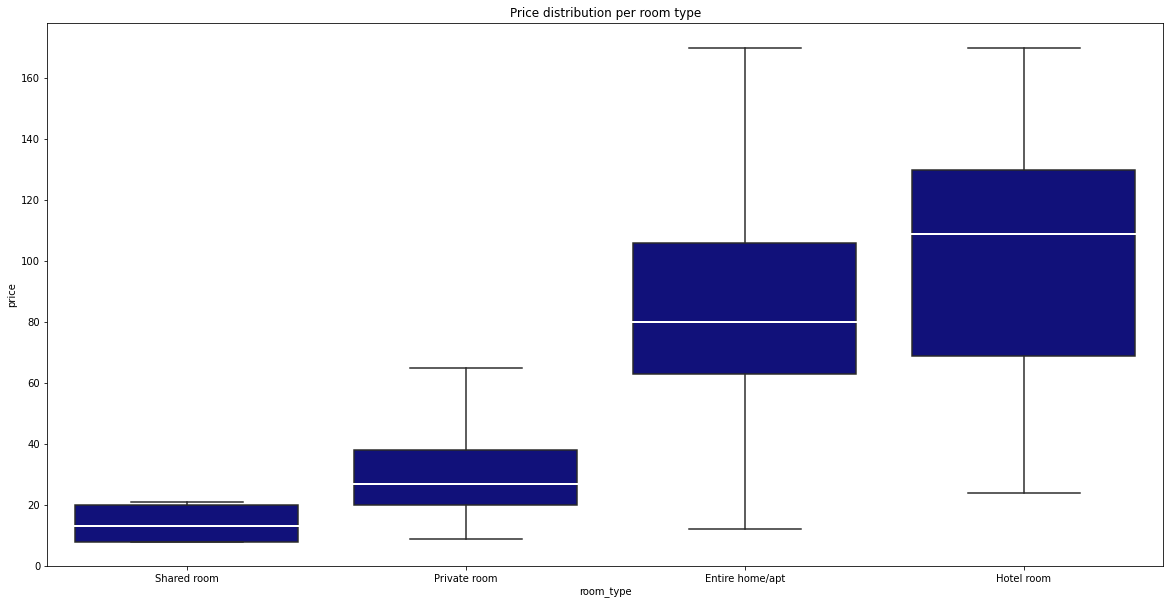

In [125]:
fig, ax2 = plt.subplots(figsize=(20,10))

roomtype_median_order = listings_clean.groupby('room_type')['price'].median().sort_values(ascending=True)

boxprops = dict(linewidth=.0)
medianprops = dict(linewidth=2, color='white')
whiskerprops = dict(linestyle='none', linewidth=.9, color='red')

sns.boxplot(x="room_type", 
            y="price", 
            data=listings_clean,
            ax=ax2, 
            #color='red',
            #palette="YlOrBr",
            color="darkblue",
            #orient='h', 
            order=roomtype_median_order.index,
            showfliers=False, 
            showbox=True, 
            showcaps=True,
            medianprops=medianprops

           )

plt.title('Price distribution per room type')
plt.show()

In [166]:
listings_clean.groupby('room_type').agg({'price':'describe'})['price'].sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Shared room,5.0,14.000000,6.284903,8.0,8.0,13.0,20.0,21.0
Private room,1265.0,39.377075,62.208823,9.0,20.0,27.0,38.0,1000.0
Entire home/apt,3389.0,92.883742,53.505095,12.0,63.0,80.0,106.0,814.0
Hotel room,21.0,111.333333,93.177429,24.0,69.0,109.0,130.0,467.0


## Q3 What else can the price depend on? What are the correlations?

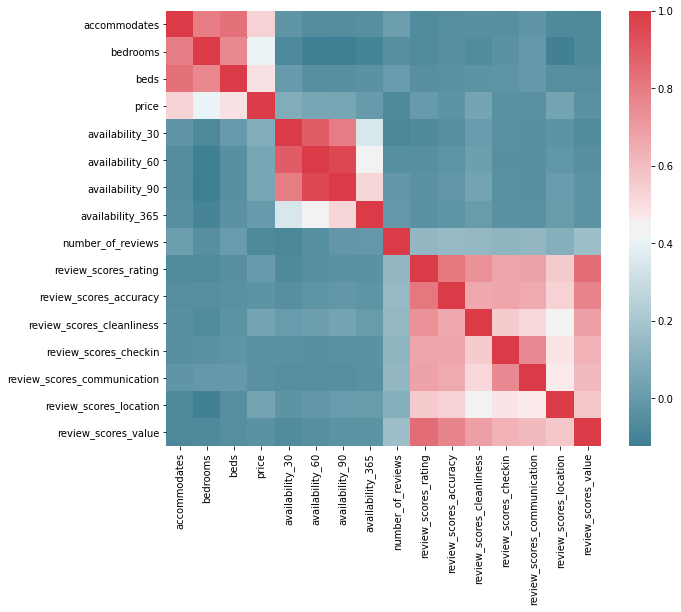

In [127]:
f, ax = plt.subplots(figsize=(10, 8))
corr = listings_clean.drop(['id','longitude','latitude'],axis=1).corr()

mask = np.triu(corr)

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

Correlation matrix shows that the most important factors impacting the price are:
- number of bedrooms
- number of beds
- number of people accomodated

Regarding other variables there are vidid correlated groups of parameters e.g. availablity within 30 days is strongly correlated with availability within 60 days and review of each area are as well strongly correlated with each other. 

We had considered correlation of numerical variables however there are other, categorical variables that can be of use and impact within the dataset. Let's attempt to build a model that would consider following factors and indicate impact of each of them

### Attempt to build a linear model

In [26]:
dff = pd.get_dummies(listings_clean, columns=['neighbourhood_group_cleansed'], prefix='nbh', dtype=int).drop(['latitude','longitude'],axis=1)

In [276]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 0 to 5544
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4680 non-null   int64  
 1   listing_url                  4680 non-null   object 
 2   host_since                   4680 non-null   object 
 3   host_response_time           4018 non-null   object 
 4   host_response_rate           4018 non-null   object 
 5   host_is_superhost            4680 non-null   object 
 6   host_has_profile_pic         4680 non-null   object 
 7   property_type                4680 non-null   object 
 8   room_type                    4680 non-null   object 
 9   accommodates                 4680 non-null   int64  
 10  bedrooms                     4680 non-null   float64
 11  beds                         4680 non-null   float64
 12  amenities                    4680 non-null   object 
 13  price             

In [34]:
dff[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 0 to 5544
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 4680 non-null   int64  
 1   bedrooms                     4680 non-null   float64
 2   beds                         4680 non-null   float64
 3   price                        4680 non-null   float64
 4   availability_30              4680 non-null   int64  
 5   availability_60              4680 non-null   int64  
 6   availability_90              4680 non-null   int64  
 7   availability_365             4680 non-null   int64  
 8   number_of_reviews            4680 non-null   int64  
 9   review_scores_rating         4136 non-null   float64
 10  review_scores_accuracy       4128 non-null   float64
 11  review_scores_cleanliness    4128 non-null   float64
 12  review_scores_checkin        4128 non-null   float64
 13  review_scores_comm

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

num_columns = list(dff.select_dtypes(include=['int64','float64']).columns)
num_columns.remove('id')
num_columns

listings_clean_num_col = dff[num_columns].drop(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication','review_scores_location','review_scores_value'], axis=1)

X = listings_clean_num_col.drop('price', axis=1)
y = listings_clean_num_col['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=45) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for the model on train set was {} on {} values.".format(r2_score(y_train, y_train_preds), len(y_train)))
print("The r-squared score for the model on train set was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))

The r-squared score for the model on train set was 0.3448651206949611 on 3276 values.
The r-squared score for the model on train set was 0.37595104353798003 on 1404 values.


Model has r-squared accuracy = 0.34 and 0.38 on a test set. It seems not to be overfitted however such a low score is not satisfactory. Perhaps we need other variables to be considered than what we have in our dataset or the linear model is just not a fit for this data distribution.